In [1]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib2
import bs4 #this is beautiful soup
import time
import operator
import socket
import cPickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

API registrations
=================

If you would like to run all the examples in this notebook, you need to register for the following APIs:

* Rotten Tomatoes

http://developer.rottentomatoes.com/member/register

* Twitter

https://apps.twitter.com/app/new

* Twitter instructions

https://twittercommunity.com/t/how-to-get-my-api-key/7033

CS109
=====

Verena Kaynig-Fittkau, Joe Blitzstein, Hanspeter Pfister

* vkaynig@seas.harvard.edu
* staff@cs109.org

Announcements
==============

* Over 400 sign ups on github!
* If you are still missing, fill out the survey, time is running out!
* Make sure you are on Piazza!


* More [git help](https://www.youtube.com/channel/UC0-KaiZFXBlGOFN71YsEV8g/videos)


* HW0 is due on Thursday 
* HW1 is coming out on Thursday


Todays lecture:
===============

* introduction to pandas
    - read a table
    - do some plots

* all about data scraping
* ***What is it? ***
* How to do it:
    - from a website
    - with an API

IPython Notebooks:
===================

![IPython](images/ipython.png "IPython")

IPython Notebooks:
===================

* These slides are an IPython notebook!
* https://github.com/damianavila/live_reveal

In [3]:
print "Hello CS109"

print "I love IPython"

# Ipython notebook have tab completion!
# and inbuild help
  
a = np.zeros(3)
print a

Hello CS109
I love IPython
[ 0.  0.  0.]


General advice about programming
==================================

* You will find nearly everything on google
* Try: length of a list in python
* A programmer is someone who can turn stack overflow snippets into running code
* Use tab completion
* Make your variable names meaningful


How to load a table
===================

* we use Pandas for this
* Pandas can do a __lot__ more
* more about it later

The MovieLens data
===================

http://grouplens.org/datasets/movielens/

![Grouplens](images/grouplens.jpg "Grouplens")

Example inspired by [Greg Reda](http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/)

Read the user data
==================

In [4]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols)

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Read the ratings
============

In [5]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols)

ratings.head() 

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Now data about the movies
=========================

In [6]:
# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 
            'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5))

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Get information about data
=======================

In [7]:
print movies.dtypes
print
print movies.describe()
# *** Why only those two columns? ***

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

          movie_id  video_release_date
count  1682.000000                   0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


Selecting data
==============

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [10]:
users.head()
print users['occupation'].head()
## *** Where did the nice design go? ***
columns_you_want = ['occupation', 'sex'] 
print users[columns_you_want].head()

print users.head()

print users.iloc[3] #iloc is integer indexing, could use loc if using labels

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object
   occupation sex
0  technician   M
1       other   F
2      writer   M
3  technician   M
4       other   F
   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213
user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object


Filtering data
==============

Select users older than 25

In [11]:
oldUsers = users[users.age > 25]
oldUsers.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


Quiz:
=====

* show users aged 40 and male

* show the mean age of female programmers

In [23]:
# users aged 40 AND male
# your code here
oldguys = users[(users.age > 40) & (users['sex'] == 'M')]
oldguys.head()


,user_id,age,sex,occupation,zip_code
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
9,10,53,M,lawyer,90703
12,13,47,M,educator,29206
13,14,45,M,scientist,55106


In [25]:
## users who are female and programmers
# your code here
ladyBadAss = users[(users.occupation == 'programmer') & (users['sex'] == 'F')]
print ladyBadAss.head()

## show statistic summary or compute mean
# your code here
ladyBadAss.age.mean()

     user_id  age sex  occupation zip_code
291      292   35   F  programmer    94703
299      300   26   F  programmer    55106
351      352   37   F  programmer    55105
403      404   29   F  programmer    55108
420      421   38   F  programmer    55105


32.166666666666664

Split-apply-combine
===================

* splitting the data into groups based on some criteria
* applying a function to each group independently
* combining the results into a data structure

Split-apply-combine
===================

<img src=http://i.imgur.com/yjNkiwL.png></img>

Find Diligent Users
===================

* split data per user ID
* count ratings
* combine result

In [83]:
#ratings.head()
## split data
grouped_data = ratings.groupby('user_id') #this gives you too much info, need to pare down
grouped_data = ratings['movie_id'].groupby(ratings['user_id'])
grouped_data.head()
## count and combine
ratings_per_user = grouped_data.count()

ratings_per_user.head(5)

user_id
1    272
2     62
3     54
4     24
5    175
Name: movie_id, dtype: int64

Quiz
====

* get the average rating per movie
* advanced: get the movie titles with the highest average rating

In [39]:
## split data
# 
ratings.head()
rating_permovie = ratings['rating'].groupby(ratings['movie_id'])

## average and combine
avgratings_permovie = rating_permovie.mean()


# get the maximum rating
maxrating = avgratings_permovie.max()

# get movie ids with that rating
highrated = avgratings_permovie[avgratings_permovie == maxrating]


movie_id
814     5
1122    5
1189    5
1201    5
1293    5
1467    5
1500    5
1536    5
1599    5
1653    5
Name: rating, dtype: float64


In [69]:
print "Good movie ids:"
bestlist = list(highrated.index)
print bestlist


bestlistIndex = [x-1 for x in bestlist];
print "Best movie titles"
goodID = movies.iloc[bestlistIndex];
print goodID.title

Good movie ids:
[814, 1122, 1189, 1201, 1293, 1467, 1500, 1536, 1599, 1653]
Best movie titles
      movie_id                                              title  \
813        814                      Great Day in Harlem, A (1994)   
1121      1122                     They Made Me a Criminal (1939)   
1188      1189                                 Prefontaine (1997)   
1200      1201         Marlene Dietrich: Shadow and Light (1996)    
1292      1293                                    Star Kid (1997)   
1466      1467               Saint of Fort Washington, The (1993)   
1499      1500                          Santa with Muscles (1996)   
1535      1536                               Aiqing wansui (1994)   
1598      1599                      Someone Else's America (1995)   
1652      1653  Entertaining Angels: The Dorothy Day Story (1996)   

     release_date  video_release_date  \
813   01-Jan-1994                 NaN   
1121  01-Jan-1939                 NaN   
1188  24-Jan-1997      

In [71]:
# get number of ratings per movie
ratings_permovie = ratings['rating'].groupby(ratings['movie_id'])

print "Number of ratings per movie"
print  ratings_permovie.count()

Number of ratings per movie
movie_id
1       452
2       131
3        90
4       209
5        86
6        26
7       392
8       219
9       299
10       89
11      236
12      267
13      184
14      183
15      293
16       39
17       92
18       10
19       69
20       72
21       84
22      297
23      182
24      174
25      293
26       73
27       57
28      276
29      114
30       37
       ... 
1653      1
1654      1
1655      1
1656      2
1657      1
1658      3
1659      1
1660      1
1661      1
1662      2
1663      1
1664      4
1665      1
1666      1
1667      1
1668      1
1669      1
1670      1
1671      1
1672      2
1673      1
1674      1
1675      1
1676      1
1677      1
1678      1
1679      1
1680      1
1681      1
1682      1
Name: rating, dtype: int64


Passing a Function
==================


In [84]:
average_ratings = grouped_data.apply(lambda f: f.mean())
#wtf is this lambda shit?
#its an anonymous function that doesn't need def or return
#now we're getting the average rating given by each user
average_ratings.head()

user_id
1    136.500000
2    249.500000
3    318.814815
4    291.041667
5    291.291429
dtype: float64

Quiz
====

* get the average rating per user
* advanced: list all occupations and if they are male or female dominant

In [87]:
# get the average rating per user
ratings_byuser = ratings['rating'].groupby(ratings['user_id']);
ratings_byuser = ratings_byuser.apply(lambda f: f.mean())

In [93]:
# list all occupations and if they are male or female dominant
users_byjob = users.groupby(users.occupation);
users_byjob.sex.value_counts()

occupation      
administrator  M     43
               F     36
artist         M     15
               F     13
doctor         M      7
educator       M     69
               F     26
engineer       M     65
               F      2
entertainment  M     16
               F      2
executive      M     29
               F      3
healthcare     F     11
               M      5
homemaker      F      6
               M      1
lawyer         M     10
               F      2
librarian      F     29
               M     22
marketing      M     16
               F     10
none           M      5
               F      4
other          M     69
               F     36
programmer     M     60
               F      6
retired        M     13
               F      1
salesman       M      9
               F      3
scientist      M     28
               F      3
student        M    136
               F     60
technician     M     26
               F      1
writer         M     26
               F     19

In [ ]:
print 'number of male users: '
print sum(users['sex'] == 'M')

print 'number of female users: '
print sum(users['sex'] == 'F')

Pandas "wrapup"
==========

- create data frames
- get sub-frames
- filter data 
- use group-by
- apply a user defined function


![cute panda](images/cute_panda.jpg)

Python data scraping
====================

* Why scrape the web?
    - vast source of information
    - automate tasks
    - keep up with sites
    - fun!

** Can you think of examples ? **

Read and Tweet!
=================

![ReadTweet](http://developer.nytimes.com/files/readtweet.jpg)

* by Justin Blinder
* http://projects.justinblinder.com/We-Read-We-Tweet

“We Read, We Tweet” geographically visualizes the dissemination of New York Times articles through Twitter. Each line connects the location of a tweet to the contextual location of the New York Times article it referenced. The lines are generated in a sequence based on the time in which a tweet occurs. The project explores digital news distribution in a temporal and spatial context through the social space of Twitter.

Twitter Sentiments
=================

![TwitterSentiments](http://www.csc.ncsu.edu/faculty/healey/tweet_viz/figs/tweet-viz-ex.png
 "Twitter Sentiments")

* by Healey and Ramaswamy
* http://www.csc.ncsu.edu/faculty/healey/tweet_viz/tweet_app/

Type a keyword into the input field, then click the Query button. Recent tweets that contain your keyword are pulled from Twitter and visualized in the Sentiment tab as circles. Hover your mouse over a tweet or click on it to see its text.

Python data scraping
====================

* copyrights and permission:
    - be careful and polite
    - give credit
    - care about media law
    - don't be evil (no spam, overloading sites, etc.)

Robots.txt
==========

![Robots.txt](images/robots_txt.jpg "Robots.txt")

Robots.txt
==========

* specified by web site owner
* gives instructions to web robots (aka your script)
* is located at the top-level directory of the web server

http://www.example.com/robots.txt

If you want you can also have a look at

http://google.com/robots.txt

Robots.txt
==========

*** What does this one do? ***

Things to consider:
-------------------

* can be just ignored
* can be a security risk - *** Why? ***

Scraping with Python:
=====================

* scraping is all about HTML tags
* bad news: 
    - need to learn about tags
    - websites can be ugly

HTML
=====

* HyperText Markup Language

* standard for creating webpages

* HTML tags 
    - have angle brackets
    - typically come in pairs

This is an example for a minimal webpage defined in HTML tags. The root tag is `<html>` and then you have the `<head>` tag. This part of the page typically includes the title of the page and might also have other meta information like the author or keywords that are important for search engines. The `<body>` tag marks the actual content of the page. You can play around with the `<h2>` tag trying different header levels. They range from 1 to 6. 

In [94]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

Useful Tags
===========

* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`


Scraping with Python:
=====================

* example of a beautifully simple webpage:

http://www.crummy.com/software/BeautifulSoup

Scraping with Python:
=====================

* good news: 
    - some browsers help
    - look for: inspect element
    - need only basic html
    
** Try 'Ctrl-Shift I' in Chrome **

** Try 'Command-Option I' in Safari **


Scraping with Python
==================

* different useful libraries:
    - urllib
    - beautifulsoup
    - pattern
    - soupy
    - LXML
    - ...
    

The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [95]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = urllib2.urlopen(url).read()
print source

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<img align="right" src="10.1.jpg" width="250"><br />

<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.</p>

<

Quiz :
======

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'alien video games' ?
    - hint: use `.find()`

In [101]:
## is 'Alice' in source?
print source.find('Alice')
##notice the parentheses instead of brackets!
##this syntax works for finding words or phrases, not html tags.

## count occurences of 'Soup'
print source.count('Soup')

## find index of 'alien video games'
print source.index('alien video games')
#.find also works

-1
41
1639


Beautiful Soup
==============

* designed to make your life easier
* many good functions for parsing html code

Some examples
=============


In [104]:
## get bs4 object
soup = bs4.BeautifulSoup(source)
 
## compare the two print statements
#print soup
#print soup.prettify()
#the second does awesome indentation to make it all readable and parseable

## show how to find all a tags
soup.findAll('a')

## ***Why does this not work? ***
soup.findAll('Soup')
#soup is not an html attribute?

[]

Some examples
=============

In [106]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, not all tags in the string
first_tag = soup.find('a')

## get attribute `href`
first_tag.get('href')

## get all links in the page
#.find just gets the first, .findAll gets all of them!
#iterate over a list of links
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

'bs4/download/'

In [107]:
## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l[:4] == 'http':
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

TypeError: 'NoneType' object has no attribute '__getitem__'

In [109]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements!
# we can't check for http in items that are none
# Let's verify
print sum([l is None for l in link_list])

# So there are two elements in the list that are None!

2


In [110]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        #is not syntax...weird. plus the word 'and' instead of &, why not logical operators?
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://www.candlemarkandgleam.com/shop/constellation-games/',
 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/',
 'https://launchpad.net/beauti

Note: The above `if` condition works because of lazy evaluation in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

In [112]:
# and we can put this in a list comprehension as well, it almost reads like 
# a sentence.

[l for l in link_list if l is not None and l.startswith('http')]
#startswith and endswith  are handy!

['https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://www.candlemarkandgleam.com/shop/constellation-games/',
 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/',
 'https://launchpad.net/beauti

Parsing the Tree
================



In [114]:
# redifining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s)

## gets everything within the html tags
root_node = tree.html
print root_node

## get head from root using contents
head = root_node.contents[0]

## get body from root
body = root_node.contents[1]
#so i guess there are only two contents to any html page, the head and the body?

## could directly access body
tree.body

<html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>


<body><h3> Test </h3><p>Hello world!</p></body>

Quiz:
=====

* Find the `h3` tag by parsing the tree starting at `body`
* Create a list of all __Hall of Fame__ entries listed on the Beautiful Soup webpage
    - hint: it is the only unordered list in the page (tag `ul`)


In [117]:
## get h3 tag from body
soup.body.h3


<h3>Beautiful Soup 3</h3>

In [123]:
## use ul as entry point
currRoot = soup.body.ul
currRoot

## get hall of fame list from entry point
## skip the first entry 
hof_items=currRoot.findAll('li');
hof_items = hof_items[1:6]
print hof_items


## reformat into a list containing strings
## it is ok to have a list of lists

[<li>Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.

</li>, <li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.

</li>, <li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.

</li>, <li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.

</li>, <li>The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA's Forecast
Applications Branch</a> uses Beautiful Soup in <a href="http://laps.noaa.gov/topograbber/">TopoGrabber</a>, a script for
downloading "high resolution USGS 

`tmp` now is actually a list of lists containing the hall of fame entries. 
Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are: 
* The use of `""` to just access the `join` function of strings.
* The `join` function itself
* that you can actually have two nested for loops in a list comprehension

In [124]:
test =  ["".join(str(a) for a in sublist) for sublist in hof_items]
print '\n'.join(test)

Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.


Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.


The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.


The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.


The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA's Forecast
Applications Branch</a> uses Beautiful Soup in <a href="http://laps.noaa.gov/topograbber/">TopoGrabber</a>, a script for
downloading "high resolution USGS datasets."




Advanced Example
===============

Idea by [Jesse Steinweg-Woods](https://jessesw.com/Data-Science-Skills/)
--------------------------------------------------------------------------------

Scraping data science skills
=============================

- What skills are in demand for data scientists?
- Should we have a lecture on Spark or only on MapReduce?

We want to scrape the information from job advertisements for data scientists from indeed.com
Let's scrape and find out!

In [126]:
# Fixed url for job postings containing data scientist
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
# read the website
source = urllib2.urlopen(url).read()
# parse html code
bs_tree = bs4.BeautifulSoup(source)
print bs_tree

<!DOCTYPE html>
<html>
<head>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<!-- pll --><link href="/q-Data-Scientist-jobs.html" rel="canonical"/><script type="text/javascript">

(function ( tk ) { if ( tk && document.images ) { var s="/", q="?", a="&", e="="; (new Image()).src = s+"rpc"+s+"log"+q+"a"+e+"jslat"+a+"tk"+e+tk; } })('19unsnff9511m9rt');
</script>
<script src="/s/8ea1af6/en_US.js" type="text/javascript"></script>
<link href="/s/6e29e52/jobsearch_all.css" rel="stylesheet" type="text/css"/>
<link href="http://rss.indeed.com/rss?q=data+scientist" rel="alternate" title="Data Scientist Jobs, Employment" type="application/rss+xml"/>
<link href="/m/jobs?q=data+scientist" media="handheld" rel="alternate"/>
<script type="text/javascript">
    
    window['closureReadyCallbacks'] = [];

    function call_when_jsall_loaded(cb) {
        if (window['closureReady']) {
            cb();
        } else {
            window['closureReadyCallbacks'].push(cb);
        }

In [128]:
# see how many job postings we found
job_count_string = bs_tree.find(id = 'searchCount').contents[0]
#get first item, maybe head, of searchCount
job_count_string = job_count_string.split()[-1]
print("Search yielded %s hits." % (job_count_string)) #simlar to matlab here, if need to
#concatenate string

# note that job_count so far is still a string, 
# not an integer, and the comma in the string of number prevents 
# us from just casting it to int

job_count_digits = [int(d) for d in job_count_string if d.isdigit()]
#get all of the separate digits
print job_count_digits
#figure out each digits position in the array and multiply by the correct power
job_count = np.sum([digit*(10**exponent) for digit, exponent in 
                    zip(job_count_digits[::-1], range(len(job_count_digits)))])

print job_count

Search yielded 22,860 hits.
[2, 2, 8, 6, 0]
22860


In [129]:
# The website is only listing 10 results per page, 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/10.0))
#first, figure out how many pages there will be

base_url = 'http://www.indeed.com'
job_links = []
for i in range(1): #do range(num_pages) if you want them all
    if i%10==0: #go up a page after each ten hits
        print num_pages-i
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    #go to each new url and read in the html
    html_page = urllib2.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page)
    #find the specific info within resultsCol>div
    job_link_area = bs_tree.find(id = 'resultsCol')
    job_postings = job_link_area.findAll("div")
    #ignore Nones and do something fancy with join...
    job_postings = [jp for jp in job_postings if not jp.get('class') is None 
                    and ''.join(jp.get('class')) =="rowresult"]
    job_ids = [jp.get('data-jk') for jp in job_postings]
    
    # go after each link
    for id in job_ids:
        job_links.append(base_url + '/rc/clk?jk=' + id)

    time.sleep(1)

print "We found a lot of jobs: ", len(job_links)

2286
We found a lot of jobs:  12


Some precautions to enable us to restart our search
=========================

In [130]:
# Save the scraped links
with open('data/scraped_links.pkl', 'wb') as f:
    cPickle.dump(job_links, f)

#dump is for save, load is for read in
    
# Read canned scraped links
with open('data/scraped_links.pkl', 'r') as f:
    job_links = cPickle.load(f)    

In [ ]:
skill_set = {'mapreduce': 0, 'spark': 0}

## write initialization into a file, so we can restart later
#with open('scraped_links_restart.pkl', 'wb') as f:
#    cPickle.dump((skill_set, 0),f)    

Python Dictonaries
==================

* build in data type
* uses key: value pairs

In [131]:
a = {'a': 1, 'b':2}
print a

#show keys
print a.keys()

#show values
print a.values()

#show for loop over all entries
# option 1 using zip
# this works also for iterating over any
# other two lists
for k,v in zip(a.keys(), a.values()):
    print k,v
    #ZIP MAKES KEY VALUE PAIRS!

# option 2 using the dictionary `iteritems()` function
for k,v in a.iteritems():
    print k,v
    #iteritems takes a dictionary thats already defined

{'a': 1, 'b': 2}
['a', 'b']
[1, 2]
a 1
b 2
a 1
b 2


In [132]:
# This code below does the trick, but could be optimized for speed if necessary
# e.g. skills are typically listed at the end of the webpage
# might not need to split/join the whole webpage, as we already know
# which words we are looking for 
# and could stop after the first occurance of each word

with open('data/scraped_links_restart.pkl', 'r') as f:
    skill_set, index = cPickle.load(f)
    print "How many websites still to go? ", len(job_links) - index
    
    

How many websites still to go?  0


In [133]:
counter = 0

for link in job_links[index:]:
    counter +=1  
    
    #if we error out on opening the link
    try:
        html_page = urllib2.urlopen(link).read()
    except urllib2.HTTPError:
        print "HTTPError:"
        continue
    except urllib2.URLError:
        print "URLError:"
        continue
    except socket.error as error:
        print "Connection closed"
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
    
    #basically iterate a counter every time we see one of the key words
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
    
    #every 5 links, print and save
    if counter % 5 == 0:
        print len(job_links) - counter - index
        print skill_set
        with open('scraped_links_restart.pkl','wb') as f:
            cPickle.dump((skill_set, index+counter),f)

In [134]:
print skill_set

{'spark': 31, 'mapreduce': 16}


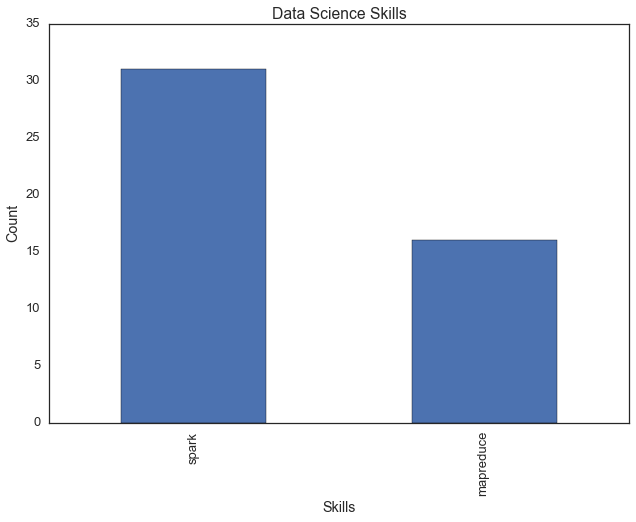

In [135]:
pseries = pd.Series(skill_set) #pd is pandas, make skill_set into a panda series
pseries.sort(ascending=False) #so sort in descending? or maybe just in the order its already in

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
## set the x label
plt.xlabel('Skills')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()

Another Example
================

Designed by Katharine Jarmul
----------------------------

https://github.com/kjam/python-web-scraping-tutorial




Scraping Happy Hours
====================

Scrape the happy hour list of LA for personal preferences

http://www.downtownla.com/3_10_happyHours.asp?action=ALL

This example is part of her talk about data scraping at PyCon2014. She is a really good speaker and I enjoyed watching her talk. Check it out: http://www.youtube.com/watch?v=p1iX0uxM1w8

In [138]:
stuff_i_like = ['burger', 'sushi', 'sweet potato fries', 'BBQ','beer']
found_happy_hours = []
my_happy_hours = []
# First, I'm going to identify the areas of the page I want to look at
url = 'http://www.downtownla.com/3_10_happyHours.asp?action=ALL'
source = urllib2.urlopen(url).read()
tables = bs4.BeautifulSoup(source)


In [139]:
# Then, I'm going to sort out the *exact* parts of the page
# that match what I'm looking for...
for t in tables.findAll('p', {'class': 'calendar_EventTitle'}):
    text = t.text #get the text of each calendar event
    for s in t.findNextSiblings():
        text += '\n' + s.text #getting allll of it
    found_happy_hours.append(text)

print "The scraper found %d happy hours!" % len(found_happy_hours)

The scraper found 73 happy hours!


In [140]:
# Now I'm going to loop through the food I like
# and see if any of the happy hour descriptions match
for food in stuff_i_like:
    for hh in found_happy_hours:
        # checking for text AND making sure I don't have duplicates
        if food in hh and hh not in my_happy_hours:
            print "YAY! I found some %s!" % food
            my_happy_hours.append(hh)

print "I think you might like %d of them, yipeeeee!" % len(my_happy_hours)

YAY! I found some burger!
YAY! I found some sushi!
YAY! I found some sushi!
YAY! I found some sushi!
YAY! I found some BBQ!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
I think you might like 22 of them, yipeeeee!


In [142]:
# Now, let's make a mail message we can read:
message = 'Hey Katharine,\n\n\n'
message += 'OMG, I found some stuff for you in Downtown, take a look.\n\n'
message += '==============================\n'.join(my_happy_hours)
message = message.encode('utf-8')
# To read more about encoding:
# http://diveintopython.org/xml_processing/unicode.html
message = message.replace('\t', '').replace('\r', '') #make it readable
message += '\n\nXOXO,\n Your Py Script'

print message

Hey Katharine,


OMG, I found some stuff for you in Downtown, take a look.


McCormick & Schmick's 


                        633 W. 5th St.
                        

Mon - Fri; 3:00 PM - 10:00 PM


                        Under $5 Happy Hour Menu Items, including $2.95 cheeseburger and fries. $3.50 minimum beverage purchase per person. Also offering a FREE shuttle to and from the Staples Center any day there is an event!
                        

http://www.mccormickandschmicks.com/Locations/southern-california-los-angeles/los-angeles-california/FifthSt.aspx

Chaya Downtown 


                        525 S. Flower St.
                        

Sun; 5:00 PM - 9:00 PMMon - Fri; 4:00 PM - 10:00 PMSat; 5:00 PM - 10:00 PM


                        Signature cocktails, wines, sushi, appetizers and rolls. Every Sunday night: Half-priced wine bottles and a $27 4-course farmer's market Chef menu.
                        

http://www.thechaya.com/downtown-la/

Takami Sushi & Robata Restaurant 


Getting Data with an API
=========================

* API: application programming interface
* some sites try to make your life easier
* Twitter, New York Times, ImDB, rotten Tomatoes, Yelp, ...

Rotten Tomatoes
===============

![The Wizard of Oz](images/wiz_oz.png "The wizard of Oz")

http://www.rottentomatoes.com/top/


API keys
=========

* required for data access
* identifies application (you)
* monitors usage
* limits rates

Rotten Tomatoes Key
===================

http://developer.rottentomatoes.com/member/register

In [145]:
import json
import requests

api_key = 'x7mqg8s4fxe57pw7vrr3q3nd'

url = 'http://api.rottentomatoes.com/api/public/v1.0/lists/dvds/top_rentals.json?apikey=' + api_key
data = urllib2.urlopen(url).read()
#print data

HTTPError: HTTP Error 403: Forbidden

JSON
======

* JavaScript Object Notation
* human readable
* transmit attribute-value pairs

In [146]:
a = {'a': 1, 'b':2}
s = json.dumps(a)
a2 = json.loads(s)

## a is a dictionary
print a
## vs s is a string containing a in JSON encoding
print s
## reading back the keys are now in unicode
#note, will have this form {u'a': 1, u'b': 2}
print a2

{'a': 1, 'b': 2}
{"a": 1, "b": 2}
{u'a': 1, u'b': 2}


In [ ]:
## create dictionary from JSON 
dataDict = json.loads(data)

## expore dictionary
print dataDict.keys()

## there is a key named `movies` containing a list of movies as a value
movies = dataDict['movies']

## each element of the list `movies` is a dictionary
print movies[0].keys()

## one of the keys is called `ratings`
## the value is yet another dictionary
print movies[0]['ratings'].keys()

## so we made it all the way to find the critics score
print movies[0]['ratings']['critics_score']


Quiz
=====

* build a list with critics scores
* build a list with audience scores

In [ ]:
# critics scores list


# audience scores list


The following code shows how to create a pandas data frame with the data we gathered from the webpage.
Beware of the `set_index()` function in pandas. Per default it does not change the actual data frame! You need to either reassign the output or set the `inplace` argument to `True`.

In [ ]:
## create pandas data frame with critics and audience score
scores = pd.DataFrame(data=[critics_scores, audience_scores]).transpose()
scores.columns = ['critics', 'audience']

## also create a list with all movie titles
movie_titles = [m['title'] for m in movies]

## set index of dataFrame BEWARE of inplace!
scores.set_index([movie_titles])

## the line above does not changes scores!
## You need to either reassign

scores = scores.set_index([movie_titles])

## or set the inplace argument to True
scores.set_index([movie_titles], inplace=True)
scores.head(3)

In [ ]:
## create a bar plot with the data
## notice that we are using the data frame itself and call its plot function
scores.plot(kind = 'bar')

## set the title to Score Comparison
plt.title('Score Comparison')

## set the x label
plt.xlabel('Movies')

## set the y label
plt.ylabel('Scores')

In [ ]:
## show the plot
plt.show()

Twitter Example:
================

* API a bit more complicated
* libraries make life easier
* python-twitter

https://github.com/bear/python-twitter

What we are going to do is scrape Joe's twitter account, and then filter it for the interesting tweets. Defining interesting as tweets that have be re-tweeted at least 10 times. 


In [ ]:
import twitter

## define the necessary keys
cKey = twitterAPI_key()
cSecret = twitterAPI_secret()
aKey = twitterAPI_access_token_key()
aSecret = twitterAPI_access_token_secret()

## create the api object with the twitter-python library
api = twitter.Api(consumer_key=cKey, consumer_secret=cSecret, access_token_key=aKey, access_token_secret=aSecret)


In [ ]:
## get the user timeline with screen_name = 'stat110'
twitter_statuses = api.GetUserTimeline(screen_name = 'stat110')

## create a data frame
## first get a list of panda Series or dict
pdSeriesList = [pd.Series(t.AsDict()) for t in twitter_statuses]

## then create the data frame
data = pd.DataFrame(pdSeriesList)

data.head(2)

In [ ]:
## filter tweets with enough retweet_count
maybe_interesting = data[data.retweet_count>20]

## get the text of these tweets
tweet_text = maybe_interesting.text

## print them out
text = tweet_text.values

for t in text:
    print '######'
    print t

Extracting columns:
===================

__Warning:__ The returned column `tweet_text` is a `view` on the data
    
* it is not a copy
* you change the Series => you change the DataFrame

Below is another example of such a view:

In [ ]:
## create a view for favorite_count on maybe_interesting
view = maybe_interesting['favorite_count']
print '-----------------'
print "This is view:"
print view
## change a value
view[8] = 9999

## look at original frame
print '-----------------'
print "This is view after changing view[8]"
print view

print '-----------------'
print "This is maybe_interesting after changing view[8]"
print "It changed too!"
print maybe_interesting['favorite_count']

## to avoid this you can use copy
independent_data = maybe_interesting['favorite_count'].copy()
independent_data[10] = 999
print '-----------------'
print "This is independent_data after changed at 10:"
print independent_data
print '-----------------'
print "This is maybe_interesting after changing independent_data:"
print "It did not change because we only changed a copy of it"
print maybe_interesting['favorite_count']

What we covered today:
============

* Pandas data frames
* Guidelines for friendly scraping
* Scraping html sites
* Scraping with Api's
* Basic data cleanup


Further material
================

* I highly recommend Katharine Jarmul's scraping tutorials
* For example [this one](https://www.youtube.com/watch?v=p1iX0uxM1w8)
* Pandas has extensive [documentation](http://pandas.pydata.org/pandas-docs/stable/)
* Especially the [tem minutes to pandas chapter](http://pandas.pydata.org/pandas-docs/stable/10min.html)

* [Greg Reda](http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/) did a lot more pandas examples for the movie lens data set